EDA

Load CSV Files

In [1]:
import pandas as pd
origin_data = pd.read_csv('Final_data.csv')

Variable Explanation

In [2]:
#Examine the columns
origin_data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'year_population', 'have_school', 'have_public_transit'],
      dtype='object')

In [3]:
#Examine Data Type
origin_data.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
year_population          int64
have_school              int64
have_public_transit      int64
dtype: object

In [4]:
# Convert 'month' to datetime and set it as the index
origin_data['month'] = pd.to_datetime(origin_data['month'])

In [5]:
# Check for duplicates
duplicate_count = origin_data.duplicated().sum()

# Show the updated 'month' column and the number of duplicates
year_head = origin_data['month'].head()
year_head, duplicate_count

# Remove duplicates
origin_data = origin_data.drop_duplicates()

# Verify removal by checking the new data shape
new_data_shape = origin_data.shape
new_data_shape

(824732, 13)

In [6]:
#First Few Rows
origin_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year_population,have_school,have_public_transit
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,3013000,0,0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,3013000,0,0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,3013000,0,0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,3013000,0,0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,3013000,0,0


In [7]:
#Last Few Rows
origin_data.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year_population,have_school,have_public_transit
826576,2020-09-01,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,440000.0,5935000,1,0
826577,2020-09-01,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,458000.0,5935000,1,0
826578,2020-09-01,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,490000.0,5935000,1,1
826579,2020-09-01,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,558000.0,5935000,1,1
826580,2020-09-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,555000.0,5935000,1,1


Observations Explanation

In [8]:
#Size of Dataset
origin_data.shape

(824732, 13)

In [9]:
#Summary Statistics
origin_data.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,year_population,have_school,have_public_transit
count,824732,824732.000000,824732.000000,8.247320e+05,8.247320e+05,824732.000000,824732.000000
mean,2004-09-12 12:10:52.872448128,95.584108,1987.152862,2.936435e+05,4.409296e+06,0.250262,0.100765
min,1990-01-01 00:00:00,28.000000,1966.000000,5.000000e+03,3.013000e+06,0.000000,0.000000
25%,1998-08-01 00:00:00,73.000000,1980.000000,1.810000e+05,3.731000e+06,0.000000,0.000000
50%,2003-08-01 00:00:00,93.000000,1986.000000,2.750000e+05,4.249000e+06,0.000000,0.000000
75%,2010-08-01 00:00:00,114.000000,1994.000000,3.830000e+05,5.074000e+06,1.000000,0.000000
max,2020-09-01 00:00:00,307.000000,2019.000000,1.258000e+06,5.935000e+06,1.000000,1.000000
std,NaN,26.054802,9.448334,1.487287e+05,8.193468e+05,0.433164,0.301017


In [10]:
#Missing Value
origin_data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year_population        0
have_school            0
have_public_transit    0
dtype: int64

Visualization

Import Library

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Histogram

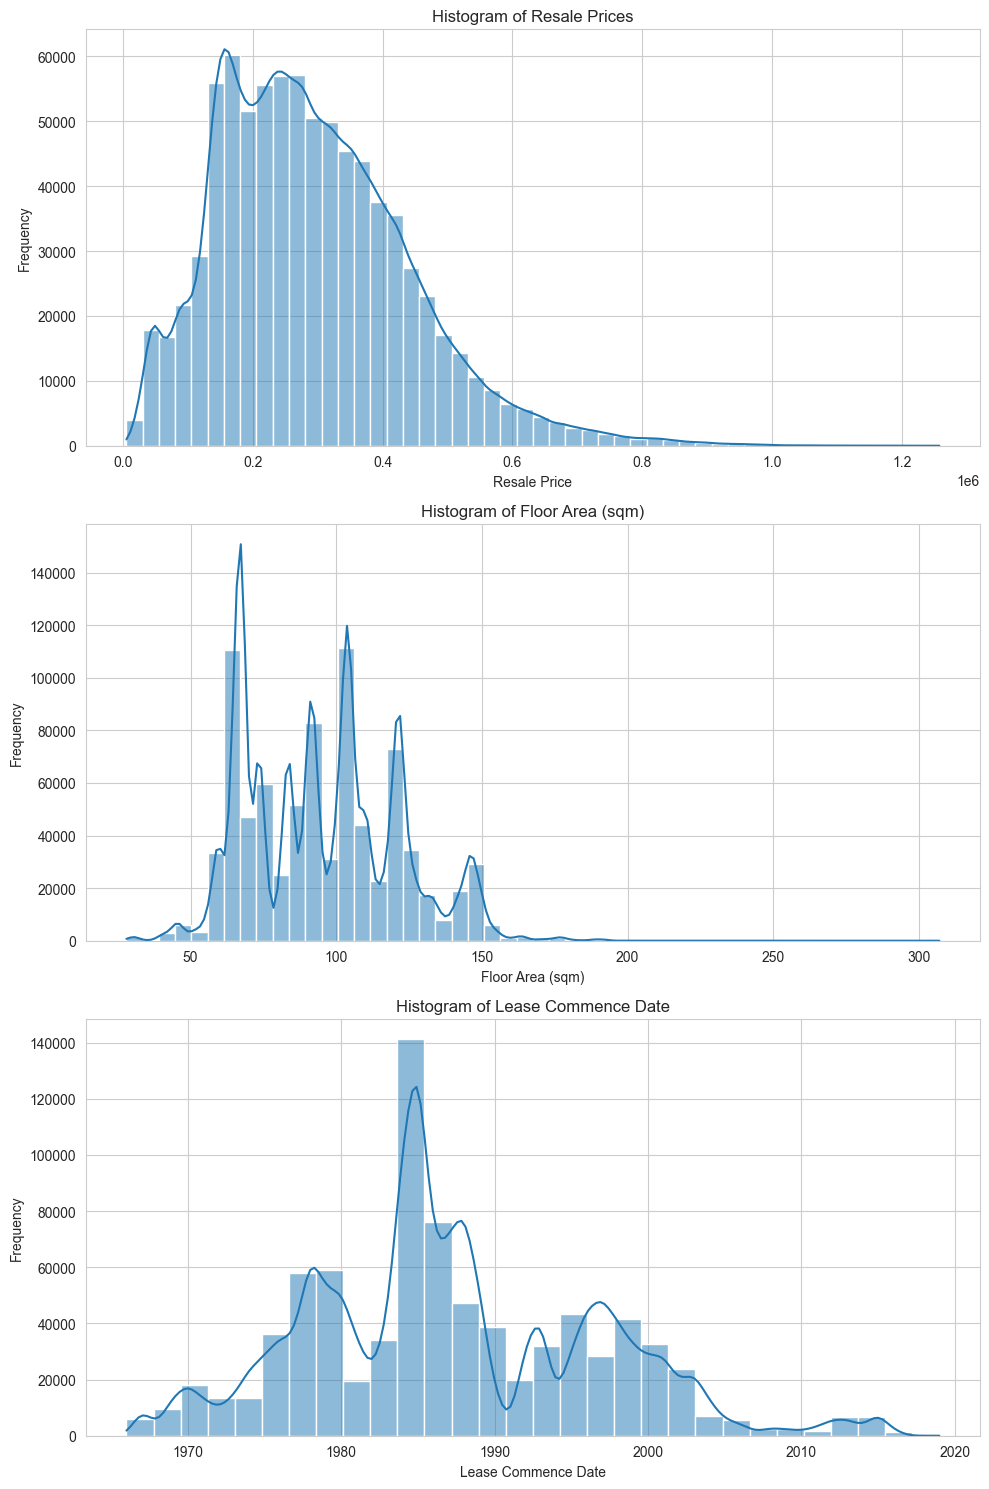

In [12]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating histograms for key variables
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Histogram for resale prices
sns.histplot(origin_data['resale_price'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Histogram of Resale Prices')
axes[0].set_xlabel('Resale Price')
axes[0].set_ylabel('Frequency')

# Histogram for floor area in square meters
sns.histplot(origin_data['floor_area_sqm'], bins=50, ax=axes[1], kde=True)
axes[1].set_title('Histogram of Floor Area (sqm)')
axes[1].set_xlabel('Floor Area (sqm)')
axes[1].set_ylabel('Frequency')

# Histogram for lease commence date
sns.histplot(origin_data['lease_commence_date'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Histogram of Lease Commence Date')
axes[2].set_xlabel('Lease Commence Date')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

BoxPlot

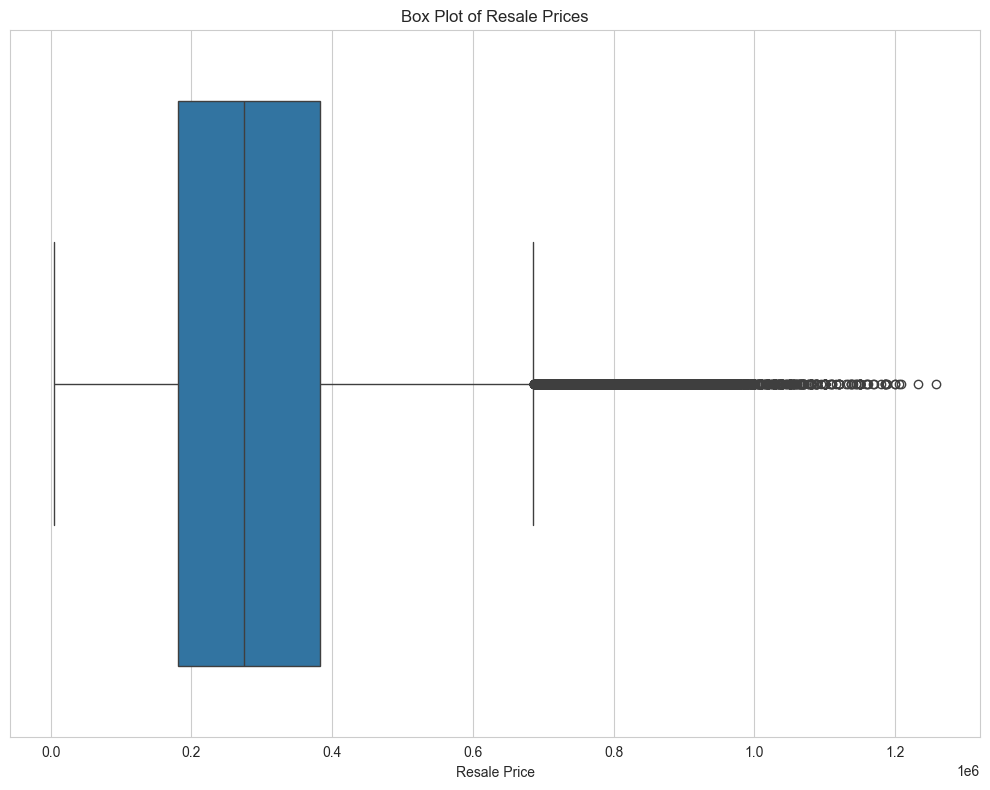

In [13]:
# Creating box plot figure
plt.figure(figsize=(10, 8))
# Box Plot for resale prices
sns.boxplot(x=origin_data['resale_price'])
plt.title('Box Plot of Resale Prices')
plt.xlabel('Resale Price')

plt.tight_layout()
plt.show()

Scatter Plots

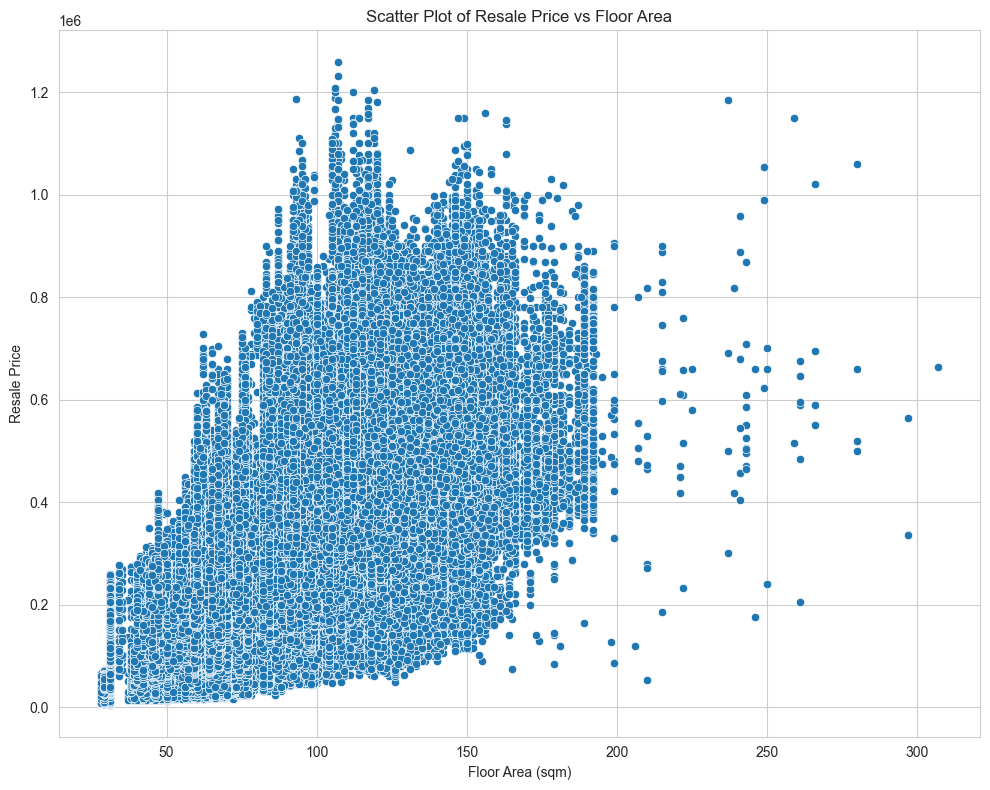

In [14]:
# Creating box plot figure
plt.figure(figsize=(10, 8))
# Scatter Plot for resale price vs floor area
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=origin_data)
plt.title('Scatter Plot of Resale Price vs Floor Area')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')

plt.tight_layout()
plt.show()

Bar Charts

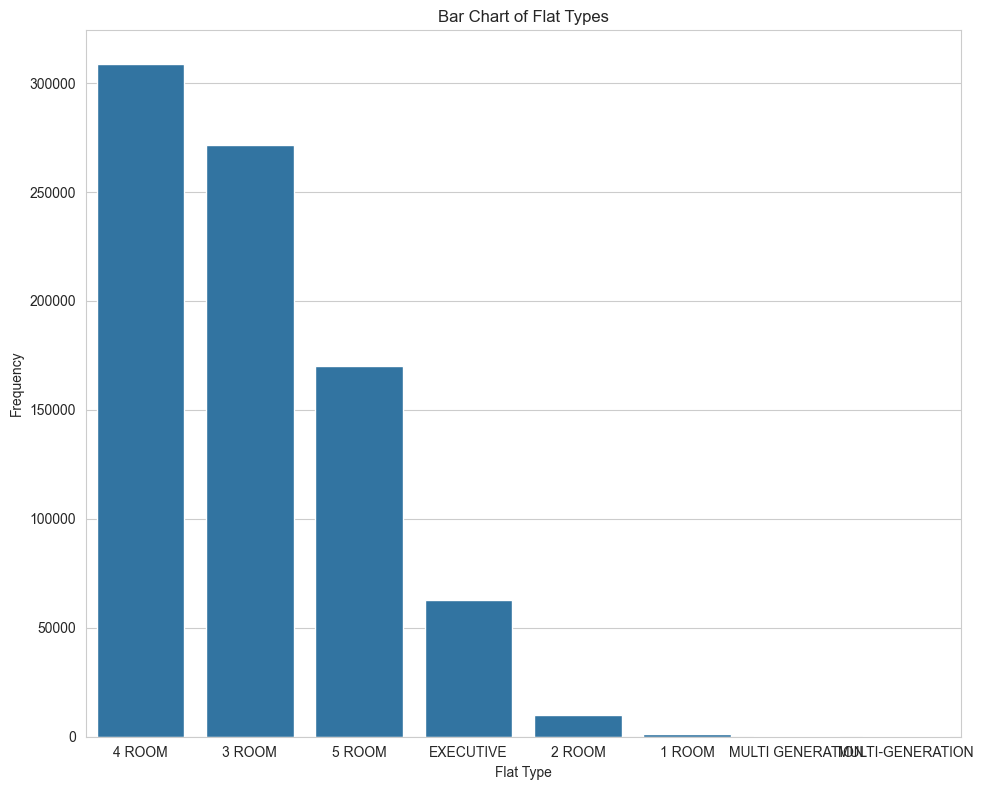

In [15]:
# Creating bar charts figure
plt.figure(figsize=(10, 8))
# Bar Chart of Flat Types
flat_type_counts = origin_data['flat_type'].value_counts()
sns.barplot(x=flat_type_counts.index, y=flat_type_counts.values)
plt.title('Bar Chart of Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Time Series Plots

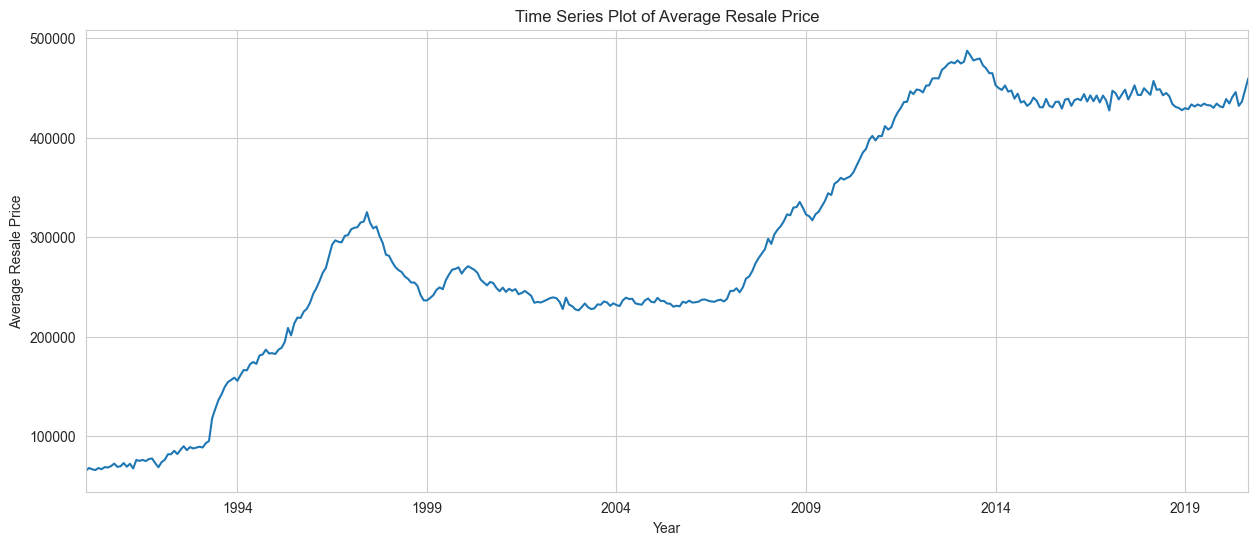

In [16]:
origin_data.set_index('month', inplace=True)

# Group by month and calculate the average resale price
monthly_avg_price = origin_data['resale_price'].resample('M').mean()

# Plotting the time series plot
plt.figure(figsize=(15, 6))
monthly_avg_price.plot()
plt.title('Time Series Plot of Average Resale Price')
plt.xlabel('Year')
plt.ylabel('Average Resale Price')
plt.grid(True)
plt.show()

Heat Maps

Additional Insights

In [17]:
origin_data['town'].unique()


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [18]:
origin_data['flat_type'].unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [19]:
origin_data['block'].unique()


array(['309', '216', '211', ..., '473A', '294A', '164A'], dtype=object)

In [20]:
origin_data['street_name'].unique()


array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [21]:
origin_data['storey_range'].unique()


array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [22]:
origin_data['floor_area_sqm'].unique()


array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [23]:
origin_data['flat_model'].unique()


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft'], dtype=object)

In [24]:
origin_data['lease_commence_date'].unique()


array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [25]:
origin_data['resale_price'].unique()

array([  9000.,   6000.,   8000., ..., 822888., 671300., 459988.])

Pre-Processing

Print Boxplot again for check

In [26]:
origin_data.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year_population,have_school,have_public_transit
month,,,,,,,,,,,,
1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,3013000,0,0
1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,3013000,0,0
1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,3013000,0,0
1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,3013000,0,0
1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,3013000,0,0


Data Transformation

One-Hot Encoding

In [27]:
data_encoded = pd.get_dummies(origin_data, columns=['town'])
data_encoded = pd.get_dummies(data_encoded , columns=['block'], sparse=True)
data_encoded = pd.get_dummies(data_encoded , columns=['street_name'], sparse=True)
data_encoded = pd.get_dummies(data_encoded , columns=['flat_model'], sparse=True)
# Display the first few rows of the updated dataset
print(data_encoded.head())


           flat_type storey_range  floor_area_sqm  lease_commence_date  \
month                                                                    
1990-01-01    1 ROOM     10 TO 12            31.0                 1977   
1990-01-01    1 ROOM     04 TO 06            31.0                 1977   
1990-01-01    1 ROOM     10 TO 12            31.0                 1977   
1990-01-01    1 ROOM     07 TO 09            31.0                 1977   
1990-01-01    3 ROOM     04 TO 06            73.0                 1976   

            resale_price  year_population  have_school  have_public_transit  \
month                                                                         
1990-01-01        9000.0          3013000            0                    0   
1990-01-01        6000.0          3013000            0                    0   
1990-01-01        8000.0          3013000            0                    0   
1990-01-01        6000.0          3013000            0                    0   
1990-01

Label Encoding

In [28]:
from sklearn import preprocessing


# Creating instance of labelencoder
labelencoder = preprocessing.LabelEncoder() 

# Assigning numerical values and storing in another column
data_encoded['flat_type_encoded'] = labelencoder.fit_transform(data_encoded['flat_type'])
data_encoded['storey_range_encoded'] = labelencoder.fit_transform(data_encoded['storey_range'])

# Display the first few rows of the updated dataset
print(data_encoded.head())

           flat_type storey_range  floor_area_sqm  lease_commence_date  \
month                                                                    
1990-01-01    1 ROOM     10 TO 12            31.0                 1977   
1990-01-01    1 ROOM     04 TO 06            31.0                 1977   
1990-01-01    1 ROOM     10 TO 12            31.0                 1977   
1990-01-01    1 ROOM     07 TO 09            31.0                 1977   
1990-01-01    3 ROOM     04 TO 06            73.0                 1976   

            resale_price  year_population  have_school  have_public_transit  \
month                                                                         
1990-01-01        9000.0          3013000            0                    0   
1990-01-01        6000.0          3013000            0                    0   
1990-01-01        8000.0          3013000            0                    0   
1990-01-01        6000.0          3013000            0                    0   
1990-01

Data Normalization

In [29]:
# Convert the column to numeric type
data_encoded['year_population'] = pd.to_numeric(data_encoded['year_population'])

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to be normalized
numerical_columns = ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'year_population']

# Create a MinMaxScaler object
minmax_scaler = MinMaxScaler()

# Fit and transform the data
data_encoded[numerical_columns] = minmax_scaler.fit_transform(data_encoded[numerical_columns])

# Display the first few rows to see the normalized data
print(data_encoded.head())

           flat_type storey_range  floor_area_sqm  lease_commence_date  \
month                                                                    
1990-01-01    1 ROOM     10 TO 12        0.010753             0.207547   
1990-01-01    1 ROOM     04 TO 06        0.010753             0.207547   
1990-01-01    1 ROOM     10 TO 12        0.010753             0.207547   
1990-01-01    1 ROOM     07 TO 09        0.010753             0.207547   
1990-01-01    3 ROOM     04 TO 06        0.161290             0.188679   

            resale_price  year_population  have_school  have_public_transit  \
month                                                                         
1990-01-01      0.003192              0.0            0                    0   
1990-01-01      0.000798              0.0            0                    0   
1990-01-01      0.002394              0.0            0                    0   
1990-01-01      0.000798              0.0            0                    0   
1990-01

Output the Dataset

In [31]:
# Write the DataFrame to a new CSV file
# data_encoded.to_csv('processed_dataset.csv', index=False)

Sem 2

In [32]:
data = data_encoded

In [33]:
# import pandas as pd
# data = pd.read_csv('processed_dataset.csv')

In [34]:
# import pandas as pd
# chunk_size = 500000  # Number of rows per chunk
# chunks = []

# for chunk in pd.read_csv('processed_dataset.csv', chunksize=chunk_size):
#    chunks.append(chunk)

# data = pd.concat(chunks)

In [35]:
# import dask.dataframe as dd

# df = dd.read_csv('processed_dataset.csv')

# mean_value = df['resale_price'].mean().compute()
# print(mean_value)

# df = df.persist()
# data = df

In [36]:
# reimport library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

ARIMA

In [37]:
# Resample the data monthly and calculate the mean resale price
monthly_data = data['resale_price'].resample('M').mean()

# Display the first few rows of the resampled data
monthly_data.head(), monthly_data.shape

(month
 1990-01-31    0.048193
 1990-02-28    0.050371
 1990-03-31    0.049389
 1990-04-30    0.048692
 1990-05-31    0.050321
 Freq: M, Name: resale_price, dtype: float64,
 (369,))

In [38]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(monthly_data)

# Creating output of test results
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output

Test Statistic                  -1.299612
p-value                          0.629350
#Lags Used                      17.000000
Number of Observations Used    351.000000
Critical Value (1%)             -3.449119
Critical Value (5%)             -2.869810
Critical Value (10%)            -2.571176
dtype: float64

In [39]:
# First differencing
monthly_data_diff = monthly_data.diff().dropna()

# Perform Augmented Dickey-Fuller test again on the differenced data
adf_result_diff = adfuller(monthly_data_diff)

# Creating output of test results for differenced data
adf_output_diff = pd.Series(adf_result_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result_diff[4].items():
    adf_output_diff[f'Critical Value ({key})'] = value

adf_output_diff

Test Statistic                  -4.131090
p-value                          0.000860
#Lags Used                      16.000000
Number of Observations Used    351.000000
Critical Value (1%)             -3.449119
Critical Value (5%)             -2.869810
Critical Value (10%)            -2.571176
dtype: float64

In [40]:
train_data = monthly_data[:-12]
test_data = monthly_data[-12:]

In [41]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import itertools

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 3)
# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Define seasonal parameter (since it's not seasonal we set these to zero)
seasonal_pdq = [(x[0], x[1], x[2], 0) for x in list(itertools.product(p, d, q))]

# Grid search to find the best ARIMA model parameters
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
best_results = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = ARIMA(train_data, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_results = results
        except:
            continue

best_aic, best_pdq, best_seasonal_pdq, best_results.summary()


C:\Users\gtyz0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gtyz0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(-2934.916723355943,
 (2, 1, 1),
 (0, 0, 0, 0),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:           resale_price   No. Observations:                  357
 Model:                 ARIMA(2, 1, 1)   Log Likelihood                1471.458
 Date:                Mon, 15 Apr 2024   AIC                          -2934.917
 Time:                        21:19:41   BIC                          -2919.440
 Sample:                    01-31-1990   HQIC                         -2928.759
                          - 09-30-2019                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1          0.6473      0.080      8.085      0.000       0.490       0.804
 ar.L2          0.2597

In [42]:
# Forecast the next 12 months
forecast = best_results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [43]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# This should be the scaler you originally used to scale your 'resale_price'
minmax_scaler = MinMaxScaler()

# Fit the scaler to the 'resale_price' data
minmax_scaler.fit(origin_data[['resale_price']])

# Now we can inverse transform the forecasted prices
predicted_unscaled = minmax_scaler.inverse_transform(forecast_mean.to_frame())

# Create a DataFrame with the index matching your forecast dates
predicted_unscaled_df = pd.DataFrame(predicted_unscaled, index=forecast_mean.index, columns=['predicted_price'])

# Print the true predicted prices
print(predicted_unscaled_df)

# Inverse transform the forecasted confidence intervals
conf_int_unscaled = minmax_scaler.inverse_transform(forecast_conf_int)

# Create a DataFrame for the unscaled confidence intervals with appropriate column names
conf_int_unscaled_df = pd.DataFrame(conf_int_unscaled, index=forecast_conf_int.index, columns=['lower_confidence', 'upper_confidence'])

# Now you have the unscaled confidence intervals
print(conf_int_unscaled_df)

monthly_data_2d = monthly_data.values.reshape(-1, 1)
monthly_data_unscaled = minmax_scaler.inverse_transform(monthly_data_2d)
monthly_data_unscaled_df = pd.DataFrame(monthly_data_unscaled, index=monthly_data.index, columns=['resale_price'])
print(monthly_data_unscaled_df)




            predicted_price
2019-10-31    432557.244017
2019-11-30    432496.583775
2019-12-31    432458.176579
2020-01-31    432417.561720
2020-02-29    432381.297526
2020-03-31    432347.276025
2020-04-30    432315.836130
2020-05-31    432286.649723
2020-06-30    432259.592442
2020-07-31    432234.498573
2020-08-31    432211.228554
2020-09-30    432189.649009
            lower_confidence  upper_confidence
2019-10-31     423277.564640     441836.923394
2019-11-30     419797.711145     445195.456405
2019-12-31     415862.997539     449053.355619
2020-01-31     412038.073917     452797.049522
2020-02-29     408158.081533     456604.513518
2020-03-31     404263.913829     460430.638221
2020-04-30     400354.091318     464277.580943
2020-05-31     396440.075049     468133.224396
2020-06-30     392529.861539     471989.323344
2020-07-31     388631.389068     475837.608078
2020-08-31     384751.389216     479671.067891
2020-09-30     380895.667201     483483.630816
             resale_price

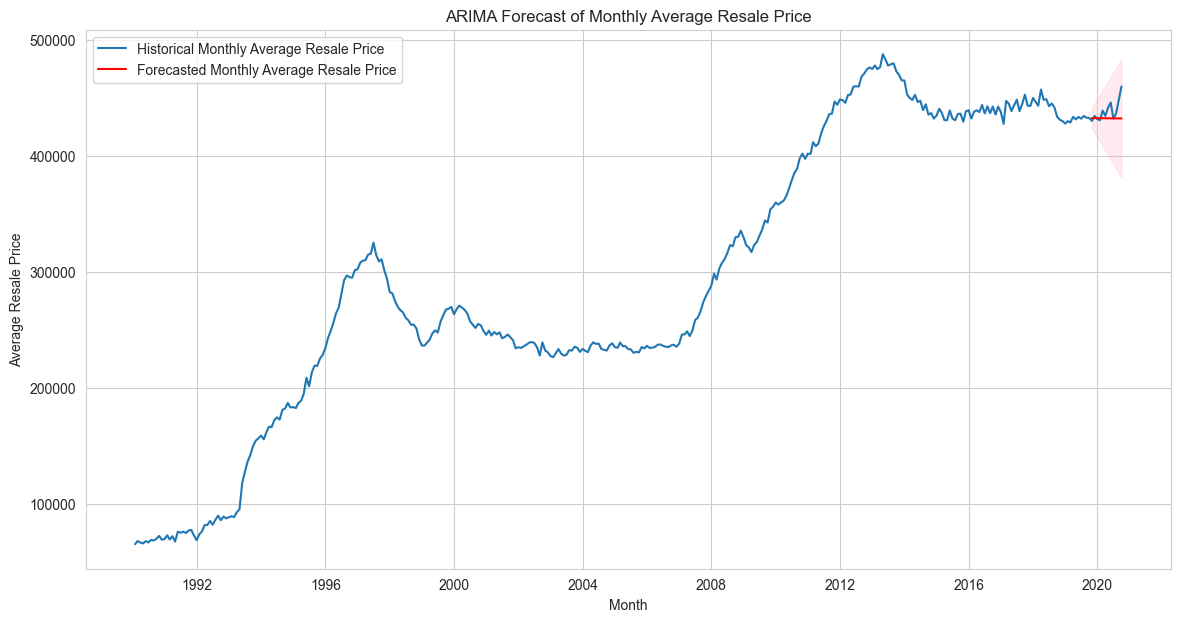

In [44]:
# Create a plot to display the historical data and the forecast with confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(monthly_data_unscaled_df, label='Historical Monthly Average Resale Price')
plt.plot(predicted_unscaled_df, label='Forecasted Monthly Average Resale Price', color='red')
plt.fill_between(conf_int_unscaled_df.index, conf_int_unscaled_df.iloc[:, 0], conf_int_unscaled_df.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast of Monthly Average Resale Price')
plt.xlabel('Month')
plt.ylabel('Average Resale Price')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

actual = test_data
predicted = forecast_mean

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 0.0057114602646653285
RMSE: 0.008476784306410261


In [46]:
y_true = actual
y_pred = predicted

# Define a function to calculate MAPE, handling cases where the actual value is zero
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    mask = y_true != 0
    return (np.fabs(y_true - y_pred) / y_true)[mask].mean() * 100

# Calculate MAPE using the function
mape = mean_absolute_percentage_error(test_data, forecast_mean)

print(f'MAPE: {mape} %')

MAPE: 1.6169035246549617 %


In [47]:
arima_model_summary = best_results.summary()
print(arima_model_summary)

                               SARIMAX Results                                
Dep. Variable:           resale_price   No. Observations:                  357
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1471.458
Date:                Mon, 15 Apr 2024   AIC                          -2934.917
Time:                        21:19:41   BIC                          -2919.440
Sample:                    01-31-1990   HQIC                         -2928.759
                         - 09-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6473      0.080      8.085      0.000       0.490       0.804
ar.L2          0.2597      0.055      4.734      0.000       0.152       0.367
ma.L1         -1.4023      0.143     -9.806      0.0

In [48]:
import pickle

# save the iris classification model as a pickle file
arima_model_pkl_file = "ARIMA_model.pkl"  

with open(arima_model_pkl_file, 'wb') as file:  
    pickle.dump(results, file)

LSTM

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the series for scaling: [data_length, 1]
data_reshaped = monthly_data.values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_reshaped)

scaled_data[:5]  # Display the first 5 scaled values

array([[0.        ],
       [0.00646564],
       [0.00354883],
       [0.00148017],
       [0.00631794]])

In [50]:
# Function to create sequences of data for LSTM
def create_dataset(dataset, look_back=12):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Generate the dataset for training LSTM
look_back = 12
X, y = create_dataset(scaled_data, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X.shape, y.shape  # Check the shape of the inputs and outputs


((357, 12, 1), (357,))

In [51]:
# Split the data into training and testing sets
train_size = len(X) - 12
test_size = 12

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((345, 12, 1), (12, 12, 1), (345,), (12,))

Epoch 1/100


C:\Users\gtyz0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0371
Epoch 2/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014
Epoch 3/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 4/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 5/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6048e-04
Epoch 6/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3878e-04
Epoch 7/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0636e-04
Epoch 8/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5664e-04
Epoch 9/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6697e-04
Epoch 10/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8936e-04
Epoch 11/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3147e-04
Epoch 12/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3977e-04
Epoch 13/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1660e-04
Epoch 14/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9940e-04
Epoch 15/100
34

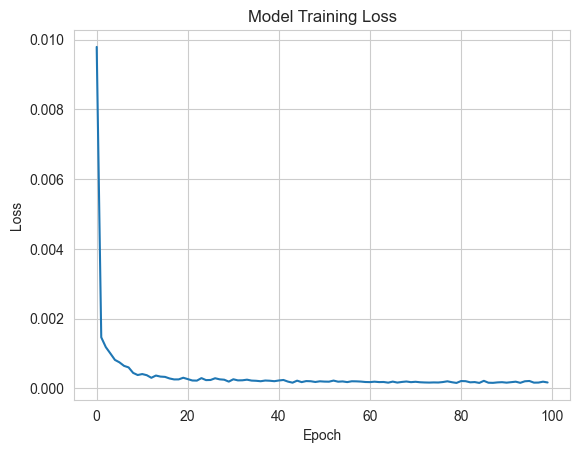

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
lstm_model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], 1)),  # 50 LSTM units
    Dense(1)  # Output layer
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

# Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [53]:
# Step 1: Make predictions on the test data
predicted = lstm_model.predict(X_test)

# Flatten the array if the predictions are in two dimensions
predicted = predicted.flatten()

predicted = predicted.reshape(-1, 1)

# Inverse transform the predictions
predicted_inversed = scaler.inverse_transform(predicted)

# Reshape back to the original shape if necessary
predicted_inversed = predicted_inversed.reshape(-1)

print(predicted_inversed)

# Step 2: Calculate performance metrics
mae = mean_absolute_error(y_test, predicted)
rmse = np.sqrt(mean_squared_error(y_test, predicted))

# To calculate MAPE, we can use the function provided earlier
mape = mean_absolute_percentage_error(y_test, predicted)

# Print the performance metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape} %')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
[0.3452181  0.34347835 0.34526178 0.3444119  0.3436886  0.34817475
 0.34739038 0.35123366 0.35513103 0.34870675 0.34818736 0.35404748]
MAE: 0.0145127109897595
RMSE: 0.01815913894956782
MAPE: 2.1641818785403824 %


In [54]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'origin_data' and 'predicted_inversed' are already defined

# Specify the exact dates as an array or list
dates = [
    "2020-10-31", "2020-11-30", "2020-12-31",
    "2021-01-31", "2021-02-28", "2021-03-31",
    "2021-04-30", "2021-05-31", "2021-06-30",
    "2021-07-31", "2021-08-31", "2021-09-30"
]

# Convert dates to pandas datetime index
forecast_dates = pd.to_datetime(dates)

# This should be the scaler you originally used to scale your 'resale_price'
minmax_scaler = MinMaxScaler()

# Fit the scaler to the 'resale_price' data
minmax_scaler.fit(origin_data[['resale_price']])

# Reshape 'predicted_inversed' to 2D array as MinMaxScaler expects 2D input for inverse_transform
predicted_inversed_reshaped = predicted_inversed.reshape(-1, 1)

# Now we can inverse transform the forecasted prices
predicted_inversed_unscaled = minmax_scaler.inverse_transform(predicted_inversed_reshaped)

# Create a DataFrame with the provided dates as the index
predicted_inversed_unscaled_df = pd.DataFrame(predicted_inversed_unscaled, index=forecast_dates, columns=['predicted_price'])

# Print the true predicted prices
print(predicted_inversed_unscaled_df)

            predicted_price
2020-10-31     437558.25000
2020-11-30     435378.37500
2020-12-31     437613.00000
2021-01-31     436548.09375
2021-02-28     435641.81250
2021-03-31     441262.93750
2021-04-30     440280.12500
2021-05-31     445095.75000
2021-06-30     449979.15625
2021-07-31     441929.53125
2021-08-31     441278.75000
2021-09-30     448621.46875


In [55]:
lstm_model_summary = lstm_model.summary()
print(lstm_model_summary)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

None


In [63]:
from tensorflow.keras.models import load_model

# Assuming `lstm_model` is your trained LSTM model
lstm_model.save('LSTM_model.h5')

Prophet

In [58]:
from prophet import Prophet

# Prepare the DataFrame for Prophet
prophet_df = monthly_data.reset_index()
prophet_df.columns = ['ds', 'resale_price']

# Show the prepared DataFrame
prophet_df.head()

,ds,resale_price
0,1990-01-31,0.048193
1,1990-02-28,0.050371
2,1990-03-31,0.049389
3,1990-04-30,0.048692
4,1990-05-31,0.050321


21:22:15 - cmdstanpy - INFO - Chain [1] start processing
21:22:15 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\gtyz0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\gtyz0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), 

            ds      yhat  yhat_lower  yhat_upper
369 2020-10-31  0.340171    0.329429    0.352160
370 2020-11-30  0.339740    0.329375    0.351426
371 2020-12-31  0.338187    0.327251    0.349465
372 2021-01-31  0.335724    0.324792    0.346468
373 2021-02-28  0.337302    0.325759    0.349172
374 2021-03-31  0.337746    0.326176    0.348642
375 2021-04-30  0.337767    0.326296    0.349701
376 2021-05-31  0.339018    0.327389    0.351241
377 2021-06-30  0.337827    0.326112    0.348739
378 2021-07-31  0.337926    0.326667    0.349526
379 2021-08-31  0.338622    0.326832    0.350094
380 2021-09-30  0.339440    0.326753    0.352643


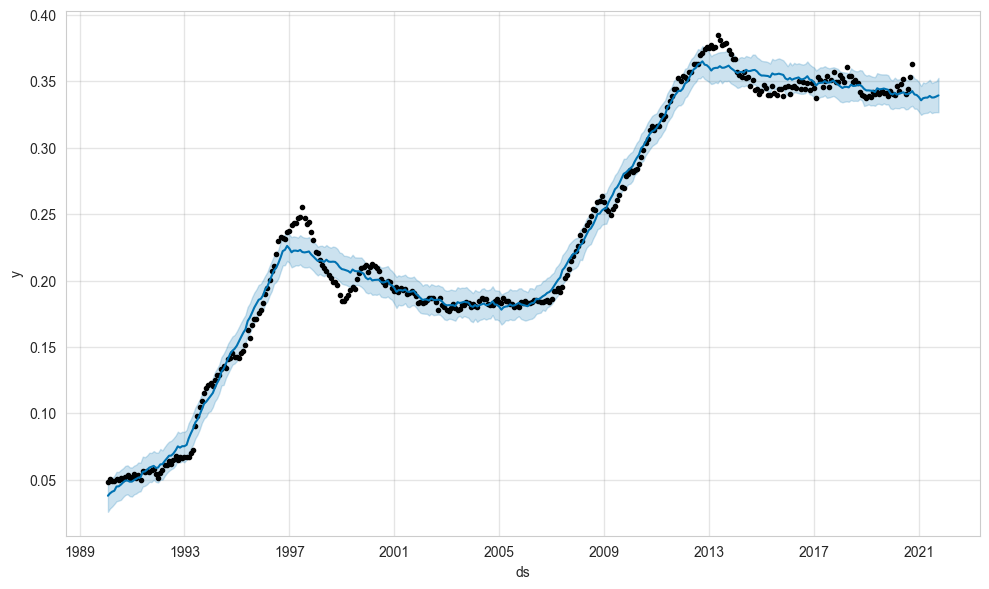

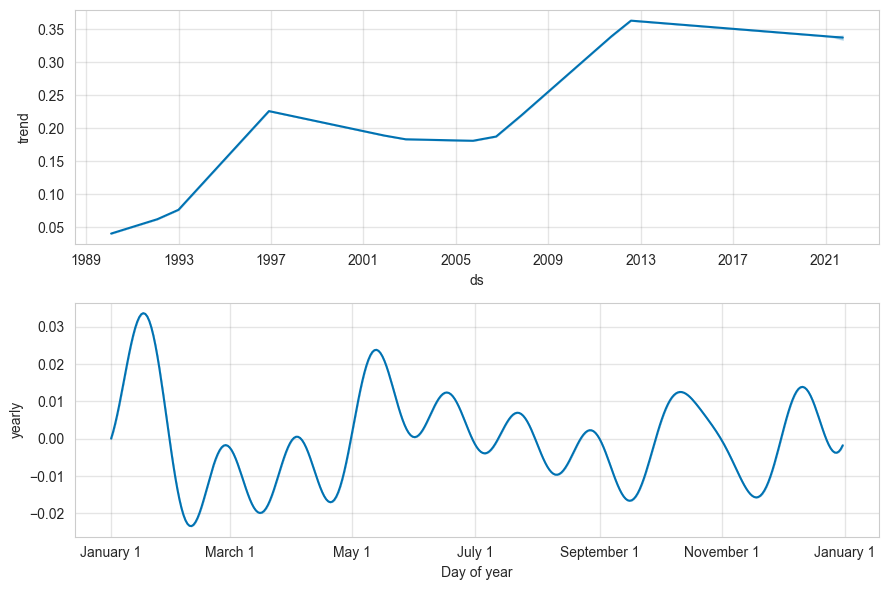

In [59]:
from prophet import Prophet
import pandas as pd

# Prepare the data
prophet_df = monthly_data.reset_index()
prophet_df.columns = ['ds', 'y']

# Initialize the Prophet model
prop_model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)

# Fit the model
prop_model.fit(prophet_df)

# Create future dataframe for predictions
future = prop_model.make_future_dataframe(periods=12, freq='M')

# Forecast the future
forecast = prop_model.predict(future)

# Plot the forecast
fig1 = prop_model.plot(forecast)
fig2 = prop_model.plot_components(forecast)

# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

In [60]:
# Step 1: Extract predicted values
predicted_prophet = forecast['yhat'][-12:].values 
actual_prophet = test_data.values

# Step 2: Calculate performance metrics
mae_prophet = mean_absolute_error(actual_prophet, predicted_prophet)
rmse_prophet = np.sqrt(mean_squared_error(actual_prophet, predicted_prophet))
mape_prophet = np.mean(np.abs((actual_prophet - predicted_prophet) / actual_prophet)) * 100

# Print the performance metrics
print(f'MAE (Prophet): {mae_prophet}')
print(f'RMSE (Prophet): {rmse_prophet}')
print(f'MAPE (Prophet): {mape_prophet} %')

MAE (Prophet): 0.007940110771963068
RMSE (Prophet): 0.010149720727695391
MAPE (Prophet): 2.260560397715025 %


In [61]:
from prophet.plot import plot_plotly, plot_components_plotly

# To visualize the forecast components
plot_components_plotly(prop_model, forecast)

# Select the columns to unscale
scaled_columns = forecast[['yhat', 'yhat_lower', 'yhat_upper']].values  # Getting the numpy array of scaled data

# Inverse transform the scaled predictions
unscaled_predictions = minmax_scaler.inverse_transform(scaled_columns)

# Create a new DataFrame with the unscaled data, preserving the original date column
unscaled_forecast = pd.DataFrame(unscaled_predictions, columns=['yhat', 'yhat_lower', 'yhat_upper'])
unscaled_forecast['ds'] = forecast['ds']

# Print the unscaled forecast DataFrame
print(unscaled_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

            ds           yhat     yhat_lower     yhat_upper
369 2020-10-31  431234.351036  417774.047016  446256.806350
370 2020-11-30  430694.838967  417706.778909  445336.571096
371 2020-12-31  428748.893907  415045.191318  442879.855980
372 2021-01-31  425662.314626  411964.369139  439124.365657
373 2021-02-28  427639.196993  413175.910191  442512.531882
374 2021-03-31  428195.199311  413698.461111  441848.711365
375 2021-04-30  428221.799800  413849.249017  443174.914160
376 2021-05-31  429789.202847  415217.976148  445105.092286
377 2021-06-30  428297.289250  413618.036960  441969.980806
378 2021-07-31  428420.796979  414313.951578  442956.142889
379 2021-08-31  429293.251725  414520.997163  443667.263159
380 2021-09-30  430317.706940  414421.474011  446861.387565


In [62]:
# save the iris classification model as a pickle file
prophet_model_pkl_file = "Prophet_model.pkl"  

with open(prophet_model_pkl_file, 'wb') as file:  
    pickle.dump(prop_model, file)

----------------------------------------------------------------------------------------------

Auto-ARIMA

In [182]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from pmdarima import auto_arima

# auto_arima_model = auto_arima(train, start_p=0, start_q=0,
#                              max_p=5, max_q=5, m=12,
#                              start_P=0, seasonal=True,
#                              d=1, D=1, trace=True,
#                              error_action='ignore',  
#                              suppress_warnings=True, 
#                              stepwise=True)

# auto_arima_model.summary()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-2504.163, Time=0.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-2359.711, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-2591.835, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-2506.570, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-2622.461, Time=0.79 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-2622.034, Time=1.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-2616.023, Time=0.16 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-2474.917, Time=0.30 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-2703.220, Time=1.39 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-2671.633, Time=0.25 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=-2702.855, Time=1.06 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=-2697.074, Time=0.57 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-2739.892, Time=1.65 sec
 ARIMA(3,1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  356
Model:             SARIMAX(5, 1, 1)x(2, 1, 1, 12)   Log Likelihood                1402.938
Date:                            Mon, 15 Apr 2024   AIC                          -2785.876
Time:                                    00:41:17   BIC                          -2747.498
Sample:                                02-28-1990   HQIC                         -2770.589
                                     - 09-30-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3303      0.303     -1.089      0.276      -0.925       0.264
ar.L2         -0.1523      0.326     -0.468      0.640      -0.791       0.486
ar.L3          0.0546      0.287      0.190      0.849      -0.508       0.618
ar.L4          0.1358      0.192      0.707      0.480      -0.241       0.512
ar.L5          0.0433      0.088      0.489      0.625      -0.130       0.217
ma.L1         -0.7252      0.302     -2.398      0.016      -1.318      -0.133
ar.S.L12       0.0078      0.091      0.086      0.931      -0.171       0.186
ar.S.L24      -0.0996      0.075     -1.336      0.181      -0.246       0.046
ma.S.L12      -0.7343      0.087     -8.416      0.000      -0.905      -0.563
sigma2      1.593e-05   1.17e-06     13.646      0.000    1.36e-05    1.82e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 9.71
Prob(Q):                              0.64   Prob(JB):                         0.01
Heteroskedasticity (H):               1.19   Skew:                             0.18
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""